In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import sklearn
import numpy as np
import pickle
pd.options.display.max_rows=9999

In [59]:
workout_data = pd.read_csv("gym.csv",sep=",")
workout_data  = workout_data[["Duration","Pulse","Maxpulse","Calories"]]
# removes all empty cells and returns a new dataset

# workout_data.dropna(inplace=True)

In [60]:
# Replace empty values
x = workout_data["Calories"].median()
y = workout_data["Calories"].mode()[0]
z = workout_data["Calories"].mean()

workout_data["Calories"].fillna(z,inplace=True)


In [61]:
# drop columns where duration is insanely high
for x in workout_data.index:
  if workout_data.loc[x,"Duration"] > 120:
    workout_data.drop(x,inplace=True)

In [62]:
print(workout_data.iloc[1:5])

   Duration  Pulse  Maxpulse  Calories
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0


In [63]:
workout_data.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.066172,-0.248043,0.299286
Pulse,-0.066172,1.000000,0.276528,0.494119
Maxpulse,-0.248043,0.276528,1.000000,0.363778
Calories,0.299286,0.494119,0.363778,1.000000


ValueError: Unrecognized marker style '-:r'

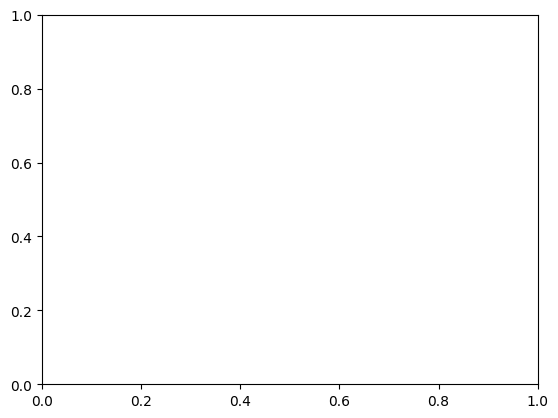

In [70]:
x = np.array(workout_data["Duration"])
y = np.array(workout_data["Calories"])
plt.plot(y,marker='o')
plt.xlabel("Duration")
plt.ylabel("Calories")
plt.show()

In [65]:
predict = "Calories"
features = workout_data.drop(predict,axis=1)
labels = workout_data[predict]

x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(features,labels,test_size=0.2)

In [66]:
best_accuracy = 0

for _ in range(20):
  model = linear_model.LinearRegression()
  x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(features,labels,test_size=0.2)
  model.fit(x_train,y_train)
  acc = model.score(x_test,y_test)
  
  if acc > best_accuracy:
    best_accuracy = acc

    with open("calories.pickle","wb") as f:
      pickle.dump(model,f)

print(f"Accuracy {best_accuracy}")

Accuracy 0.5335690925855157


In [67]:
model_in = open("calories.pickle","rb")
model = pickle.load(model_in)
predictions = model.predict(x_test)

for x in range(len(predictions)):
  print(predictions[x])


309.4497771574468
339.7524609498435
341.53398294762854
278.90260932235634
292.53859102637097
334.79073425297787
292.53859102637097
